In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [2]:
# file
file_drive = "./data/drive/2022-11-01-17-34-00_3p15.csv"
df1 = pd.read_csv(file_drive, index_col=0)
sample_name = file_drive[-28:-4]
print(sample_name)
df1.head()

2022-11-01-17-34-00_3p15


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/11/01 15:57:37,33.003235,27.183228,468377.0,1203142.0,3137.732676,1820.036822,3.249450e+15,1.620043e+15,13.6,14.6
1,2022/11/01 15:57:39,32.972717,27.132492,475821.0,1191717.0,3167.555062,1821.631163,3.249450e+15,1.620043e+15,13.6,14.6
2,2022/11/01 15:57:43,32.945251,27.140503,475741.0,1190631.0,3165.545262,1822.735223,3.249449e+15,1.620042e+15,13.6,14.6
3,2022/11/01 15:57:45,32.949829,27.164536,475741.0,1190631.0,3152.925198,1821.511767,3.249449e+15,1.620042e+15,13.6,14.6
4,2022/11/01 15:57:47,32.981873,27.153854,473560.0,1202116.0,3145.335849,1818.227591,3.249449e+15,1.620042e+15,13.6,14.6


In [3]:
# file
file_drive = "./data/FOV/2022-11-01-17-34-10_FOV_3p15.csv"
df2 = pd.read_csv(file_drive, index_col=0)
df2.head()

,Time,-x,+x,2x,-y,+y,2y
0,2022/11/01 15:57:55,-27.188208,27.697153,54.885361,-18.582645,18.967525,37.550170
1,2022/11/01 15:57:56,-27.188208,27.697153,54.885361,-18.582645,18.967525,37.550170
2,2022/11/01 15:57:57,-27.188208,27.697153,54.885361,-18.582645,18.967525,37.550170
3,2022/11/01 15:57:58,-27.188208,27.697153,54.885361,-18.631856,19.016512,37.648367
4,2022/11/01 15:57:59,-27.188208,27.697153,54.885361,-18.631856,19.016512,37.648367


In [4]:
#file
file_drive = "./data/temp/2022-11-01-16-43-37_temp_3p15.csv"
df3 = pd.read_csv(file_drive, index_col=0)
df3.tail()

,Time,set_temperature,temperature,param1,param2,param3,param4
2641,2022/11/01 16:43:33,25.0,24.911020,22.0,4.449000,-1.331064,19.826138
2642,2022/11/01 16:43:34,25.0,24.999950,-1.0,0.002513,-1.334259,0.011092
2643,2022/11/01 16:43:35,25.0,25.088927,-24.0,-4.446339,-1.338736,-19.192146
2644,2022/11/01 16:43:36,25.0,24.999950,-1.0,0.002513,-1.343536,0.011007
2645,2022/11/01 16:43:37,25.0,24.999950,-1.0,0.002513,-1.346327,0.011185


In [5]:
time1 = pd.to_datetime(df1["Time"]) 
time1 = time1.dt.round("s")

time2 = pd.to_datetime(df2["Time"]) 
time2 = time2.dt.round("s")

time3 = pd.to_datetime(df3["Time"]) 
time3 = time3.dt.round("s")

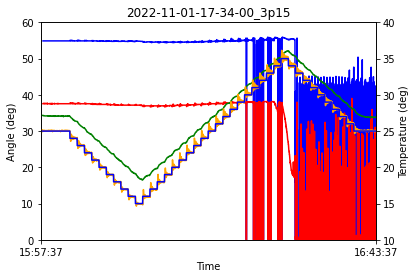

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # 二つ目の軸を定義

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

sxmin='2022-11-01 15:57:37'
sxmax='2022-11-01  16:43:37'
xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d %H:%M:%S')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d %H:%M:%S')
plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(0,60)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

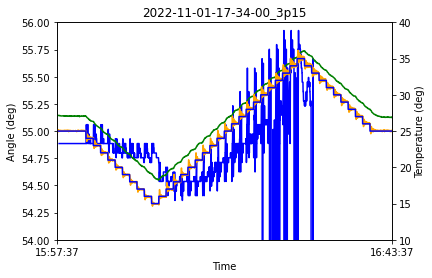

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # 二つ目の軸を定義

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

sxmin='2022-11-01 15:57:37'
sxmax='2022-11-01  16:43:37'
xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d %H:%M:%S')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d %H:%M:%S')
plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(54,56)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

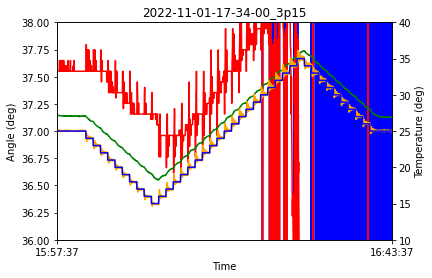

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # 二つ目の軸を定義

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

sxmin='2022-11-01 15:57:37'
sxmax='2022-11-01  16:43:37'
xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d %H:%M:%S')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d %H:%M:%S')
plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(36,38)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

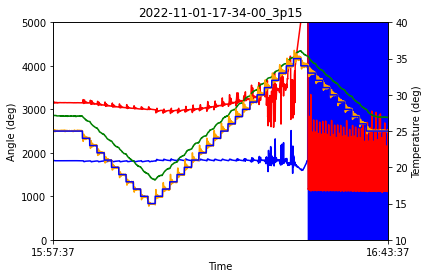

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # 二つ目の軸を定義

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

sxmin='2022-11-01 15:57:37'
sxmax='2022-11-01  16:43:37'
xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d %H:%M:%S')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d %H:%M:%S')
plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(0,5000)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

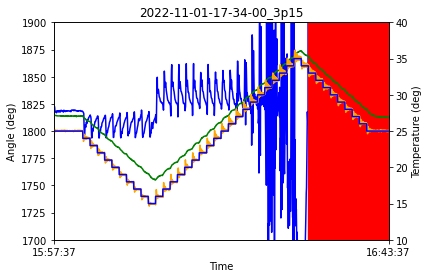

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # 二つ目の軸を定義

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

sxmin='2022-11-01 15:57:37'
sxmax='2022-11-01  16:43:37'
xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d %H:%M:%S')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d %H:%M:%S')
plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1700,1900)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

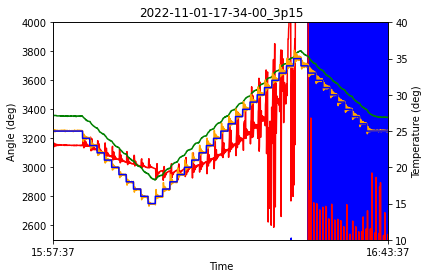

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # 二つ目の軸を定義

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

sxmin='2022-11-01 15:57:37'
sxmax='2022-11-01  16:43:37'
xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d %H:%M:%S')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d %H:%M:%S')
plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(2500,4000)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

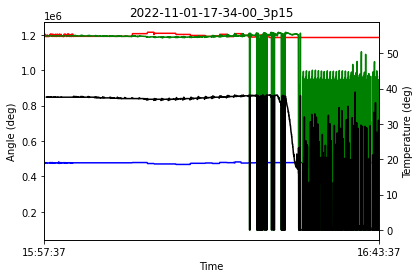

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # 二つ目の軸を定義

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

sxmin='2022-11-01 15:57:37'
sxmax='2022-11-01  16:43:37'
xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d %H:%M:%S')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d %H:%M:%S')
plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(0,5000)
#ax2.set_ylim(10,40)

ax1.plot(time1, df1["vpp_sum1"], color='b')
ax1.plot(time1, df1["vpp_sum2"], color='r')
ax2.plot(time2, df2["2x"], color='g')
ax2.plot(time2, df2["2y"], color='k')
#ax2.plot(time3, df3["temperature"], color='orange')
#ax2.plot(time3, df3["set_temperature"], color='b')